## bibliotecas

In [91]:
from PIL import Image, ImageOps
import matplotlib.pyplot as plt
from pylab import *
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.nasnet import NASNetLarge, preprocess_input
from tensorflow.keras.applications.efficientnet import EfficientNetB6, preprocess_input
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input, decode_predictions
from tensorflow.keras.applications.densenet import DenseNet121, preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from sklearn.model_selection import train_test_split

### modelos

In [154]:
modelo1 = DenseNet121(weights='imagenet', include_top=False, input_shape=(224,224,3))

In [93]:
modelo2 = NASNetLarge(weights='imagenet', include_top=False, input_shape=(224,224,3))

In [94]:
modelo3 = EfficientNetB6(weights='imagenet', include_top=False, input_shape=(224,224,3))

## imagens

In [37]:
def plot_im5(im1, tit1, im2, tit2, im3, tit3, im4, tit4, im5, tit5, tam):
    figure(figsize=tam)
    plt.subplot(1, 5, 1), plt.imshow(im1), plt.title(tit1)
    plt.xticks([]), plt.yticks([])
    plt.subplot(1, 5, 2), plt.imshow(im2), plt.title(tit2)
    plt.xticks([]), plt.yticks([])
    plt.subplot(1, 5, 3), plt.imshow(im3), plt.title(tit3)
    plt.xticks([]), plt.yticks([])
    plt.subplot(1, 5, 4), plt.imshow(im4), plt.title(tit4)
    plt.xticks([]), plt.yticks([])
    plt.subplot(1, 5, 5), plt.imshow(im5), plt.title(tit5)
    plt.xticks([]), plt.yticks([])
    plt.show()

In [16]:
path = "C:/Users/user/Documents/Aranouá/imgs_ml/"

In [23]:
im_g_1 = path+"gato_1.jpg"
im_g_1 = image.load_img(im_g_1, target_size=(224, 224))

In [27]:
im_g_2 = path+"gato_2.jpg"
im_g_2 = image.load_img(im_g_2, target_size=(224, 224))

In [29]:
im_g_3 = path+"gato_3.jpg"
im_g_3 = image.load_img(im_g_3, target_size=(224, 224))

In [30]:
im_g_4 = path+"gato_4.jpg"
im_g_4 = image.load_img(im_g_4, target_size=(224, 224))

In [31]:
im_g_5= path+"gato_5.jfif"
im_g_5 = image.load_img(im_g_5, target_size=(224, 224))

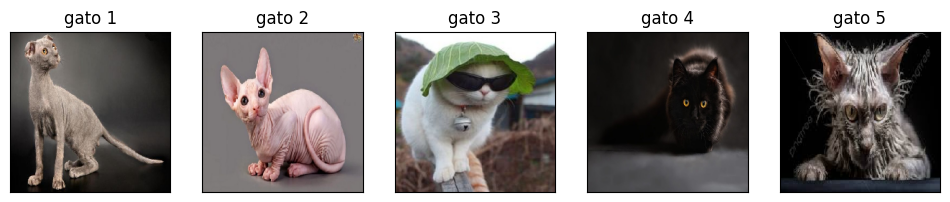

In [49]:
plot_im5(im_g_1, "gato 1",im_g_2 , "gato 2", im_g_3, "gato 3",im_g_4 , "gato 4", im_g_5, "gato 5", (12,12))

In [39]:
im_c_1 = path+"cao_1.jpg"
im_c_1 = image.load_img(im_c_1, target_size=(224, 224))

In [40]:
im_c_2= path+"cao_2.jpg"
im_c_2 = image.load_img(im_c_2, target_size=(224, 224))

In [42]:
im_c_3= path+"cao_3.webp"
im_c_3 = image.load_img(im_c_3, target_size=(224, 224))

In [45]:
im_c_4= path+"cao_4.jfif"
im_c_4 = image.load_img(im_c_4, target_size=(224, 224))

In [47]:
im_c_5= path+"cao_5.webp"
im_c_5 = image.load_img(im_c_5, target_size=(224, 224))

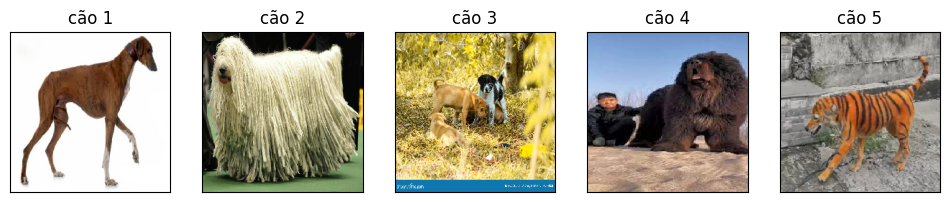

In [50]:
plot_im5(im_c_1, "cão 1",im_c_2 , "cão 2", im_c_3, "cão 3",im_c_4 , "cão 4", im_c_5, "cão 5", (12,12))

## treinamento dc_small dos modelos

In [95]:
num_classes = 2

In [152]:
for layer in modelo1.layers:
    layer.trainable = False

In [97]:
for layer in modelo2.layers:
    layer.trainable = False

In [98]:
for layer in modelo3.layers:
    layer.trainable = False

In [155]:
modelo1 = tf.keras.Sequential(
    [modelo1,
     GlobalAveragePooling2D(),
     Dense(1024, activation="relu"),
     Dense(num_classes, activation = 'softmax')
    ])

In [100]:
modelo2 = tf.keras.Sequential(
    [modelo2,
     GlobalAveragePooling2D(),
     Dense(1024, activation="relu"),
     Dense(num_classes, activation = 'softmax')
    ])

In [101]:
modelo3 = tf.keras.Sequential(
    [modelo3,
     GlobalAveragePooling2D(),
     Dense(1024, activation="relu"),
     Dense(num_classes, activation = 'softmax')
    ])

In [156]:
modelo1.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
               loss = 'categorical_crossentropy',
               metrics = ['accuracy'])

In [103]:
modelo2.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
               loss = 'categorical_crossentropy',
               metrics = ['accuracy'])

In [104]:
modelo3.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
               loss = 'categorical_crossentropy',
               metrics = ['accuracy'])

In [157]:
path = "C:/Users/user/visao_am/imagens_visao_am/dc_small/"

In [158]:
def cria_dataframe(caminho):
    arquivos = []
    rotulos = []
    for arquivo in os.listdir(caminho):
        if arquivo.startswith('cat'):
            rotulos.append('cat')
        elif arquivo.startswith('dog'):
            rotulos.append('dog')
        arquivos.append(arquivo)
    return pd.DataFrame({'arquivo':arquivos, 'rotulo':rotulos})

In [159]:
df_dados = cria_dataframe(os.path.join(path, 'train'))

In [160]:
train_df, validation_df = train_test_split(df_dados, test_size = 0.2, stratify = df_dados['rotulo'])

In [161]:
test_df = cria_dataframe(os.path.join(path, 'test'))

In [162]:
train_datagen = ImageDataGenerator(preprocessing_function = preprocess_input)
validation_datagen = ImageDataGenerator(preprocessing_function = preprocess_input)
test_datagen = ImageDataGenerator(preprocessing_function = preprocess_input)

In [163]:
train_generator = train_datagen.flow_from_dataframe(
    train_df,
    directory=os.path.join(path, 'train'),
    x_col = 'arquivo',
    y_col='rotulo',
    target_size=(224,224),
    batch_size = 32,
    class_mode = 'categorical'
)

Found 1600 validated image filenames belonging to 2 classes.


In [164]:
validation_generator = train_datagen.flow_from_dataframe(
    validation_df,
    directory=os.path.join(path, 'train'),
    x_col = 'arquivo',
    y_col='rotulo',
    target_size=(224,224),
    batch_size = 32,
    class_mode = 'categorical'
)

Found 400 validated image filenames belonging to 2 classes.


In [165]:
test_generator = train_datagen.flow_from_dataframe(
    test_df,
    directory=os.path.join(path, 'test'),
    x_col = 'arquivo',
    y_col='rotulo',
    target_size=(224,224),
    batch_size = 32,
    class_mode = 'categorical'
)

Found 1000 validated image filenames belonging to 2 classes.


In [178]:
modelo1.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data = validation_generator,
    validation_steps = validation_generator.samples // validation_generator.batch_size,
    epochs = 2
)

Epoch 1/2


KeyboardInterrupt: 

In [170]:
test_loss, test_accuracy = modelo1.evaluate(test_generator, steps = test_generator.samples // test_generator.batch_size)
print(f'Acurácia no teste: {test_accuracy}')

16/31 [==============>...............] - ETA: 33s - loss: 1.6637 - accuracy: 0.8340

KeyboardInterrupt: 

In [192]:
modelo2.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data = validation_generator,
    validation_steps = validation_generator.samples // validation_generator.batch_size,
    epochs = 2
)

Epoch 1/2
50/50 [==============================] - 423s 8s/step - loss: 0.3632 - accuracy: 0.9112 - val_loss: 0.1132 - val_accuracy: 0.9583
Epoch 2/2
50/50 [==============================] - 386s 8s/step - loss: 0.0801 - accuracy: 0.9675 - val_loss: 0.1053 - val_accuracy: 0.9531


In [197]:
test_loss, test_accuracy = modelo2.evaluate(test_generator, steps = test_generator.samples // test_generator.batch_size)
print(f'Acurácia no teste: {test_accuracy}')

31/31 [==============================] - 193s 6s/step - loss: 0.1340 - accuracy: 0.9476
Acurácia no teste: 0.9475806355476379


In [200]:
modelo3.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data = validation_generator,
    validation_steps = validation_generator.samples // validation_generator.batch_size,
    epochs = 2
)

Epoch 1/2
50/50 [==============================] - 276s 5s/step - loss: 0.5974 - accuracy: 0.6994 - val_loss: 0.4945 - val_accuracy: 0.7422
Epoch 2/2
50/50 [==============================] - 259s 5s/step - loss: 0.5188 - accuracy: 0.7337 - val_loss: 0.5530 - val_accuracy: 0.7370


In [201]:
test_loss, test_accuracy = modelo3.evaluate(test_generator, steps = test_generator.samples // test_generator.batch_size)
print(f'Acurácia no teste: {test_accuracy}')

31/31 [==============================] - 125s 4s/step - loss: 0.5446 - accuracy: 0.7278
Acurácia no teste: 0.7278226017951965


## classes

In [183]:
classes = ['dog', 'cat']

In [188]:
def prediz(img, img2, img3, img4, img5):
    img_p = image.img_to_array(img)
    img_p = np.expand_dims(img_p, axis=0)
    imp_p = preprocess_input(img_p)

    pred = modelo1.predict(img_p)
    resultado_classe = np.argmax(pred[0])
    print('Predição imagem 1: ', classes[resultado_classe])

    img_p = image.img_to_array(img2)
    img_p = np.expand_dims(img_p, axis=0)
    imp_p = preprocess_input(img_p)

    pred = modelo1.predict(img_p)
    resultado_classe = np.argmax(pred[0])
    print('Predição imagem 2: ', classes[resultado_classe])

    img_p = image.img_to_array(img3)
    img_p = np.expand_dims(img_p, axis=0)
    imp_p = preprocess_input(img_p)

    pred = modelo1.predict(img_p)
    resultado_classe = np.argmax(pred[0])
    print('Predição imagem 3: ', classes[resultado_classe])

    img_p = image.img_to_array(img4)
    img_p = np.expand_dims(img_p, axis=0)
    imp_p = preprocess_input(img_p)

    pred = modelo1.predict(img_p)
    resultado_classe = np.argmax(pred[0])
    print('Predição imagem 4: ', classes[resultado_classe])

    img_p = image.img_to_array(img5)
    img_p = np.expand_dims(img_p, axis=0)
    imp_p = preprocess_input(img_p)

    pred = modelo1.predict(img_p)
    resultado_classe = np.argmax(pred[0])
    print('Predição imagem 5: ', classes[resultado_classe])

# inferência 1

In [189]:
prediz(im_g_1,im_g_2, im_g_3,im_g_4,im_g_5 )

1/1 [==============================] - 4s 4s/step
Predição imagem 1:  dog
1/1 [==============================] - 0s 161ms/step
Predição imagem 2:  dog
1/1 [==============================] - 0s 137ms/step
Predição imagem 3:  cat
1/1 [==============================] - 0s 142ms/step
Predição imagem 4:  dog
1/1 [==============================] - 0s 142ms/step
Predição imagem 5:  dog


In [191]:
prediz(im_c_1,im_c_2, im_c_3,im_c_4,im_c_5 )

1/1 [==============================] - 0s 153ms/step
Predição imagem 1:  cat
1/1 [==============================] - 0s 301ms/step
Predição imagem 2:  dog
1/1 [==============================] - 0s 200ms/step
Predição imagem 3:  cat
1/1 [==============================] - 0s 130ms/step
Predição imagem 4:  cat
1/1 [==============================] - 0s 188ms/step
Predição imagem 5:  dog


## inferência 2

In [194]:
def prediz2(img, img2, img3, img4, img5):
    img_p = image.img_to_array(img)
    img_p = np.expand_dims(img_p, axis=0)
    imp_p = preprocess_input(img_p)

    pred = modelo2.predict(img_p)
    resultado_classe = np.argmax(pred[0])
    print('Predição imagem 1: ', classes[resultado_classe])

    img_p = image.img_to_array(img2)
    img_p = np.expand_dims(img_p, axis=0)
    imp_p = preprocess_input(img_p)

    pred = modelo2.predict(img_p)
    resultado_classe = np.argmax(pred[0])
    print('Predição imagem 2: ', classes[resultado_classe])

    img_p = image.img_to_array(img3)
    img_p = np.expand_dims(img_p, axis=0)
    imp_p = preprocess_input(img_p)

    pred = modelo2.predict(img_p)
    resultado_classe = np.argmax(pred[0])
    print('Predição imagem 3: ', classes[resultado_classe])

    img_p = image.img_to_array(img4)
    img_p = np.expand_dims(img_p, axis=0)
    imp_p = preprocess_input(img_p)

    pred = modelo2.predict(img_p)
    resultado_classe = np.argmax(pred[0])
    print('Predição imagem 4: ', classes[resultado_classe])

    img_p = image.img_to_array(img5)
    img_p = np.expand_dims(img_p, axis=0)
    imp_p = preprocess_input(img_p)

    pred = modelo2.predict(img_p)
    resultado_classe = np.argmax(pred[0])
    print('Predição imagem 5: ', classes[resultado_classe])

In [198]:
prediz2(im_g_1,im_g_2, im_g_3,im_g_4,im_g_5 )

1/1 [==============================] - 1s 618ms/step
Predição imagem 1:  cat
1/1 [==============================] - 0s 401ms/step
Predição imagem 2:  dog
1/1 [==============================] - 0s 471ms/step
Predição imagem 3:  cat
1/1 [==============================] - 0s 439ms/step
Predição imagem 4:  dog
1/1 [==============================] - 0s 387ms/step
Predição imagem 5:  dog


In [199]:
prediz2(im_c_1,im_c_2, im_c_3,im_c_4,im_c_5 )

1/1 [==============================] - 0s 395ms/step
Predição imagem 1:  dog
1/1 [==============================] - 0s 431ms/step
Predição imagem 2:  cat
1/1 [==============================] - 0s 386ms/step
Predição imagem 3:  cat
1/1 [==============================] - 0s 494ms/step
Predição imagem 4:  cat
1/1 [==============================] - 0s 410ms/step
Predição imagem 5:  dog


## inferência 3

In [204]:
def prediz3(img, img2, img3, img4, img5):
    img_p = image.img_to_array(img)
    img_p = np.expand_dims(img_p, axis=0)
    imp_p = preprocess_input(img_p)

    pred = modelo3.predict(img_p)
    resultado_classe = np.argmax(pred[0])
    print('Predição imagem 1: ', classes[resultado_classe])

    img_p = image.img_to_array(img2)
    img_p = np.expand_dims(img_p, axis=0)
    imp_p = preprocess_input(img_p)

    pred = modelo3.predict(img_p)
    resultado_classe = np.argmax(pred[0])
    print('Predição imagem 2: ', classes[resultado_classe])

    img_p = image.img_to_array(img3)
    img_p = np.expand_dims(img_p, axis=0)
    imp_p = preprocess_input(img_p)

    pred = modelo3.predict(img_p)
    resultado_classe = np.argmax(pred[0])
    print('Predição imagem 3: ', classes[resultado_classe])

    img_p = image.img_to_array(img4)
    img_p = np.expand_dims(img_p, axis=0)
    imp_p = preprocess_input(img_p)

    pred = modelo3.predict(img_p)
    resultado_classe = np.argmax(pred[0])
    print('Predição imagem 4: ', classes[resultado_classe])

    img_p = image.img_to_array(img5)
    img_p = np.expand_dims(img_p, axis=0)
    imp_p = preprocess_input(img_p)

    pred = modelo3.predict(img_p)
    resultado_classe = np.argmax(pred[0])
    print('Predição imagem 5: ', classes[resultado_classe])

In [206]:
prediz3(im_g_1,im_g_2, im_g_3,im_g_4,im_g_5 )

1/1 [==============================] - 0s 331ms/step
Predição imagem 1:  cat
1/1 [==============================] - 0s 420ms/step
Predição imagem 2:  cat
1/1 [==============================] - 0s 438ms/step
Predição imagem 3:  cat
1/1 [==============================] - 0s 294ms/step
Predição imagem 4:  cat
1/1 [==============================] - 0s 458ms/step
Predição imagem 5:  dog


In [207]:
prediz3(im_c_1,im_c_2, im_c_3,im_c_4,im_c_5 )

1/1 [==============================] - 0s 438ms/step
Predição imagem 1:  cat
1/1 [==============================] - 0s 303ms/step
Predição imagem 2:  cat
1/1 [==============================] - 0s 367ms/step
Predição imagem 3:  cat
1/1 [==============================] - 0s 427ms/step
Predição imagem 4:  cat
1/1 [==============================] - 0s 487ms/step
Predição imagem 5:  dog
